### Etsy Sales Data Analysys
1. Import and cleanse the data

In [1]:
import pandas as pd
import datetime
import numpy as np

In [2]:
file_name = '..//Data//EtsySoldOrderItems2019-{}.csv'
df2 = pd.concat([pd.read_csv(file_name.format(i)) for i in range(3, 13)])
df2.columns = df2.columns.str.replace(' ','_').str.lower()
df2['sale_date'] = pd.to_datetime(df2['sale_date'])
df2['sale_month'] = df2['sale_date'].dt.date
df2['sale_month'] = df2['sale_month'] + pd.offsets.MonthEnd(0) 
df2['discount_used'] = np.where(df2['discount_amount']== 0, 0,1)

In [3]:
file_name = '..//Data//EtsySoldOrderItems2020-{}.csv'
df1 = pd.concat([pd.read_csv(file_name.format(i)) for i in range(1, 13)])
df1.columns = df1.columns.str.replace(' ','_').str.lower()
df1['sale_date'] = pd.to_datetime(df1['sale_date'])
df1['sale_month'] = df1['sale_date'].dt.date
df1['sale_month'] = df1['sale_month'] + pd.offsets.MonthEnd(0) 
df1['discount_used'] = np.where(df1['discount_amount']== 0, 0,1)

In [4]:
file_name = '..//Data//EtsySoldOrderItems2021-{}.csv'
df = pd.concat([pd.read_csv(file_name.format(i)) for i in range(1, 4)])
df.columns = df.columns.str.replace(' ','_').str.lower()
df['sale_date'] = pd.to_datetime(df['sale_date'])
df['sale_month'] = df['sale_date'].dt.date
df['sale_month'] = df['sale_month'] + pd.offsets.MonthEnd(0) 
df['discount_used'] = np.where(df['discount_amount']== 0, 0,1)

In [5]:
raw_data = pd.concat([df,df1,df2])

In [6]:
raw_data.shape

(1477, 35)

In [15]:
raw_data.head(5)

,sale_date,item_name,buyer,quantity,price,coupon_code,coupon_details,discount_amount,delivery_discount,order_delivery,...,order_type,listings_type,payment_type,inperson_discount,inperson_location,vat_paid_by_buyer,sku,sale_month,discount_used,item_group
0,2021-01-31,"Dolls Bedding - bed cot quilt, Kmart planter h...",Connie (cheggie2011),1,29.0,NaN,NaN,0.0,0.0,20,...,online,listing,online_cc,NaN,NaN,0,NaN,2021-01-31,0,Doll Bedding
1,2021-01-30,"Wash Cloth organic bamboo cotton, baby wash ba...",Monika (montastic),1,10.0,CLOTHBUNDLE;CLOTHBUNDLE;CLOTHBUNDLE,CLOTHBUNDLE - % off;CLOTHBUNDLE - % off;CLOTHB...,4.5,0.0,0,...,online,listing,online_cc,NaN,NaN,0,NaN,2021-01-31,1,Wash Cloth
2,2021-01-30,Native Eucalyptus flannels organic bamboo cott...,Monika (montastic),1,10.0,CLOTHBUNDLE;CLOTHBUNDLE;CLOTHBUNDLE,CLOTHBUNDLE - % off;CLOTHBUNDLE - % off;CLOTHB...,0.0,0.0,0,...,online,listing,online_cc,NaN,NaN,0,NaN,2021-01-31,0,Wash Cloth
3,2021-01-30,"Wash Cloth organic bamboo cotton, floral baby ...",Monika (montastic),1,10.0,CLOTHBUNDLE;CLOTHBUNDLE;CLOTHBUNDLE,CLOTHBUNDLE - % off;CLOTHBUNDLE - % off;CLOTHB...,0.0,0.0,0,...,online,listing,online_cc,NaN,NaN,0,NaN,2021-01-31,0,Wash Cloth
4,2021-01-28,"Doll Nappy -21cm/ 38cm Doll, Dolly Diaper, Dol...",NaN,1,9.0,NaN,NaN,0.0,0.0,0,...,online,listing,online_cc,NaN,NaN,0,NaN,2021-01-31,0,Doll Nappy


### Item categorisation
1. Create strings to search against
2. Add new item searches below

In [6]:
wash_cloth = 'Wash Cloth'
wash_cloth_1 = 'Washer'
wash_cloth_2 = 'flannels'
hair_clip = 'Hair Clip'
hair_clip_1 = 'hair clips'
hair_clip_2 = 'hair clip'
hair_ties = 'Hair Ties'
bib = 'Bib'
bib_1 = 'bib'
burp_cloth = 'Burp Cloth'
doll_bedding = 'Doll Bedding'
doll_bedding_1 = 'Dolls Bedding'
play_mat = 'Play Mat'
play_mat_1 = 'play mat'
play_mat_2 = 'playmat'
doll_nappy = 'Doll Nappy'
bow_holder = 'Bow holder'
basket = 'basket'
clothing = 'romper'

In [7]:
def item_group(item_name):
    if wash_cloth in item_name or wash_cloth_1 in item_name or wash_cloth_2 in item_name: # Add new item
        return 'Wash Cloth'
    elif hair_clip in item_name or hair_clip_1 in item_name or hair_clip_2 in item_name:
        return 'Hair Clip'
    elif bib in item_name or bib_1 in item_name:
        return 'Bib'
    elif doll_bedding in item_name or doll_bedding_1 in item_name:
        return 'Doll Bedding'
    elif play_mat in item_name or play_mat_1 in item_name or play_mat_2 in item_name:
        return 'Play Mat'
    elif doll_nappy in item_name:
        return 'Doll Nappy'
    elif hair_ties in item_name:
        return 'Hair Tie'
    elif basket in item_name:
        return 'Basket'
    elif burp_cloth in item_name:
        return 'Burp Cloth'
    elif clothing in item_name:
        return 'Clothing'
    else:
        return 'Non Grouped'

In [8]:
raw_data['item_group'] = raw_data['item_name'].apply(item_group)

In [9]:
raw_data['price'] = raw_data['price'].astype(float)

### Initial Data Analysis
1. Sales by Month
2. Sales by Country
3. Discount code usage by Month
3. Top selling items
4. Top selling recent items

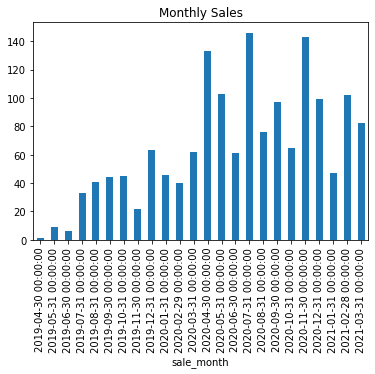

In [256]:
raw_data.groupby('sale_month')['quantity'].sum().plot.bar(x='sale_month', y='quantity',title='Monthly Sales')

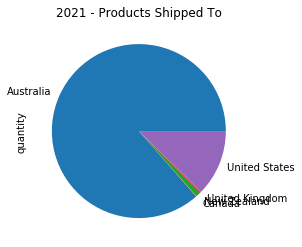

In [257]:
raw_data.groupby('delivery_country')['quantity'].sum().plot.pie(x='delivery_country', y='quantity',title='2021 - Products Shipped To')

In [239]:
raw_data.groupby('sale_month').agg({'discount_used': 'sum', 'quantity': 'sum'})

,discount_used,quantity
sale_month,,
2019-04-30,0,1
2019-05-31,2,9
2019-06-30,2,6
2019-07-31,6,33
2019-08-31,5,41
2019-09-30,6,44
2019-10-31,4,45
2019-11-30,2,22
2019-12-31,6,63


In [11]:
raw_data.groupby(['item_group']).agg({'quantity': 'sum','price':'sum'})

,quantity,price
item_group,,
Basket,56,1617.0
Bib,290,3453.0
Burp Cloth,30,447.0
Clothing,74,2498.0
Doll Bedding,154,4062.0
Doll Nappy,60,622.5
Hair Clip,316,2790.0
Hair Tie,15,78.0
Non Grouped,120,5046.5


In [12]:
recent = raw_data[(raw_data['sale_month'] == '2021-03-31') | (raw_data['sale_month'] == '2021-02-28') | (raw_data['sale_month'] == '2021-01-31')]

In [109]:
recent_sort = recent.groupby(['item_group']).agg({'quantity': 'sum', 'price':'sum'})

In [110]:
recent_sort.sort_values(by = 'quantity', ascending=False).head(10)

,quantity,price
item_group,,
Wash Cloth,62,502.0
Bib,47,601.0
Hair Clip,27,323.0
Doll Nappy,23,223.0
Non Grouped,21,693.0
Doll Bedding,19,510.0
Play Mat,19,1546.0
Basket,8,225.0
Burp Cloth,3,39.0


In [ ]:
multi_orders = raw_data.groupby(['delivery_name']).agg({'quantity': 'sum','order_id':'nunique', 'price':'sum'})

In [84]:
multi_orders.sort_values(by = 'order_id', ascending=False).head(10)

,quantity,order_id,price
delivery_name,,,
Haylee Turner,14,8,379.0
Kaitlyn Wise,10,7,228.0
Claire Boyce,10,7,204.0
Kirsty Finch,8,6,143.5
Chrystal Dow,6,5,317.5
Cassie Parnaby,9,5,259.0
Stephanie Curran,17,5,195.0
Rowena Fawole,5,4,139.0
Melissa Camilleri,8,3,67.0


### Item count
1. Investing highest selling items

In [86]:
item_count = raw_data.groupby(['item_name']).agg({'quantity': 'sum','order_id':'nunique', 'price':'sum'})

In [88]:
item_count.sort_values(by = 'quantity', ascending=False).head(10)

,quantity,order_id,price
item_name,,,
Velvet Snap Hair Clip | Single clip or a Set of two - Olive & Miles - Free Postage,110,70,741.0
"Wash Cloth organic bamboo cotton, floral baby wash bath cloth, face washer, reusable face wipes, baby girl gift, Olive & Miles - FREE POST",90,51,914.0
"Baby girl pink floral bib, reversible vintage style bib, smash cake bib, boho fringe girl bib, first birthday bib, olive & miles FREE POST",89,84,1028.0
"Wash Cloth organic bamboo cotton, baby wash bath cloth, double gauze face washer, reusable face wipes, baby gift, Olive & Miles - FREE POST",87,39,740.0
Corduroy Fabric Hair Clip | One clip or a set of two - Olive & Miles - Free Postage,68,41,372.0
"Wash Cloth organic bamboo cotton, baby wash bath cloth, mcn cloth nappy, face washer, reusable face wipes, baby gift, Olive & Miles",52,27,488.0
"Washer organic bamboo cotton, native floral baby wash bath cloth, eucalyptus face washer, reusable face wipes, baby gift, Olive & Miles",44,22,409.0
Pastel Snap Hair Clip | Gingham pink blue mustard - Set of two - Olive & Miles - Free Postage,40,28,320.0
"Reversible linen vintage style bib, baby girl linen gingham, smash cake bib, boho fringe bib, first birthday bib, olive & miles FREE POST",37,36,442.0


### Wash cloth analysis
1. Investing top selling variations

In [94]:
wash_cloth_all = raw_data[raw_data['item_group']=='Wash Cloth']

In [100]:
wash_cloth_group = wash_cloth_all.groupby(['variations']).agg({'quantity': 'sum', 'price':'sum'})

In [101]:
wash_cloth_group.sort_values(by = 'quantity', ascending=False).head(10)

,quantity,price
variations,,
Colour:Protea floral,20,197.0
Colour:Peony,18,161.0
Colour:Mixed Eucalyptus,18,142.0
Colour:Autumn Floral,18,152.0
Colour:Eucalyptus,16,174.0
Colour:Watercolour floral,16,174.0
Colour:Dark Pink,13,120.0
Colour:Baby Pink,12,100.0
Colour:Purple mini floral,12,129.0


### Top selling play mats

In [104]:
play_mats = raw_data[raw_data['item_group']=='Play Mat']

In [107]:
play_mats_grp = play_mats.groupby(['item_name']).agg({'quantity': 'sum', 'price':'sum'})

In [108]:
play_mats_grp.sort_values(by = 'quantity', ascending=False).head(10)

,quantity,price
item_name,,
"Velvet Dusty Pink play mat / rug, baby girl playmat, tummy time, quilted padded mat, pink rug, play nursery rug, Olive & Miles - FREE POST",25,2064.0
"Velvet playmat/rug - FREE POSTAGE, baby play mat, newborn tummy time, quilted padded baby mat, dusty green play nursery rug, Olive & Miles",16,1290.0
"Wildflower playmat/rug - FREE POSTAGE, baby play mat, newborn tummy time, Australian padded baby mat, floral play nursery rug, Olive & Miles",12,1213.0
"Velvet playmat/rug - FREE POSTAGE, baby play mat, newborn tummy time, quilted padded baby mat, dusty sage play nursery rug, Olive & Miles",9,692.0
"Doll play mat, doll accessories, pretend play, sibling gift, miniland born dolly round play mat, baby girl nursery - Olive & Miles",9,286.0
"Eucalyptus playmat/rug - FREE POSTAGE, baby play mat, newborn tummy time, Australian padded baby mat, unisex play nursery rug, Olive & Miles",8,811.0
"Velvet round Bean bag/ floor mat/ playmat/ rug/ floor cushion, play mat pink, baby girl nursery, pink bean bag rug cushion - Olive & Miles",6,509.0
"Velvet cream play mat / rug, baby girl boy playmat, tummy time, quilted padded mat, boho rug, unisex nursery rug, Olive & Miles - FREE POST",5,340.0
"Velvet cream play mat / rug, baby girl boy playmat, tummy time, quilted bay mat, boho rug, unisex nursery rug, Olive & Miles - FREE POST",4,275.0


### Basket Variation Sales

In [10]:
baskets = raw_data[raw_data['item_group']=='Basket']

In [11]:
baskets_grp = baskets.groupby(['variations']).agg({'quantity': 'sum', 'price':'sum'})

In [13]:
baskets_grp.sort_values(by = 'quantity', ascending=False).head(10)

,quantity,price
variations,,
basket:Medium,20,580.0
basket:Small,13,325.0
basket:Large,12,384.0
basket:Petite,2,36.0
"Colours:Baby Pink,Personalisation:Baby pink and blue please",1,25.0
"Colours:Grey,Personalisation:Two grey please.",1,25.0
"Colours:Hot Pink,Personalisation:Hot pink and white please",1,25.0
"First Basket:Blue,Second Basket:Baby Pink",1,25.0


### Data Statistics
1. The average order price is 23.48
2. When removing the order prices above 50 the average comes down to 16.17

In [46]:
raw_data.describe()

,price,discount_amount,delivery_discount,order_sales_tax,inperson_discount,inperson_location,sku,discount_used
count,1477.000000,1477.000000,1477.0,1477.000000,0.0,0.0,0.0,1477.000000
mean,23.486798,0.867691,0.0,0.053643,NaN,NaN,NaN,0.096141
std,24.287963,3.699515,0.0,0.706277,NaN,NaN,NaN,0.294884
min,2.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,0.000000
25%,10.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,0.000000
50%,13.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,0.000000
75%,29.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,0.000000
max,135.000000,57.200000,0.0,16.800000,NaN,NaN,NaN,1.000000


In [47]:
raw_data.price.mean()

23.486797562626947

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb58bbbaf50>]],
      dtype=object)

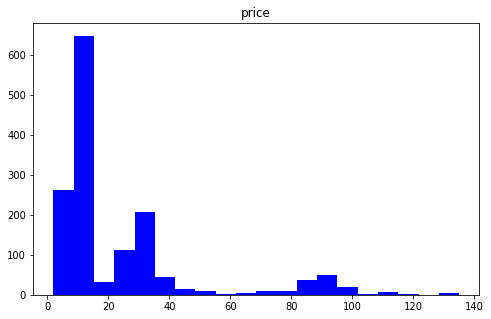

In [74]:
raw_data.hist(column = 'price', bins=20, grid=False, figsize=(8,5), color='blue')

In [83]:
mean_d = raw_data[raw_data['price'] <= 50]
mean_d.price.mean()

16.174436090225562

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb58bd05bd0>]],
      dtype=object)

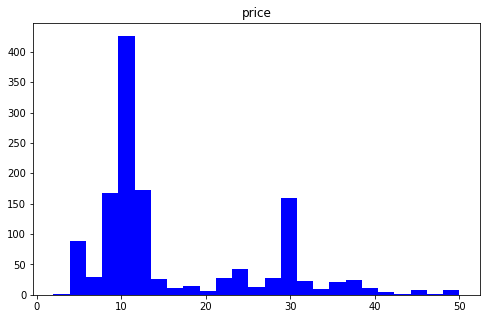

In [75]:
mean_d.hist(column = 'price', bins=25, grid=False, figsize=(8,5), color='blue')

## File output

In [225]:
null_items = raw_data[raw_data['item_group']=='']

In [265]:
null_items.to_csv('..//Output//non_grouped_items.csv',index=False)

In [10]:
raw_data.to_csv('..//Output//full_dataset.csv', index=False)